Toxic Comment Classification

Import modules

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Download and Loading

1.1 Loading Data with pandas

In [11]:
def load_data(train_path, test_path, test_labels_path=None):
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    if test_labels_path:
        df_test_labels = pd.read_csv(test_labels_path)
        return df_train, df_test, df_test_labels
    return df_train, df_test

# Example usage
df_train, df_test = load_data(
    'Dataset/train.csv',
    'Dataset/test.csv',
)

1.2 Initial Inspection

Display dimensions:

In [12]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (159571, 8)
Test shape: (153164, 2)


Show first rows:

In [13]:
display(df_train.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Null values by column in train:

In [14]:
print(df_train.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


Label distribution in train:

In [15]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(df_train[label_cols].sum().sort_values(ascending=False))

toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


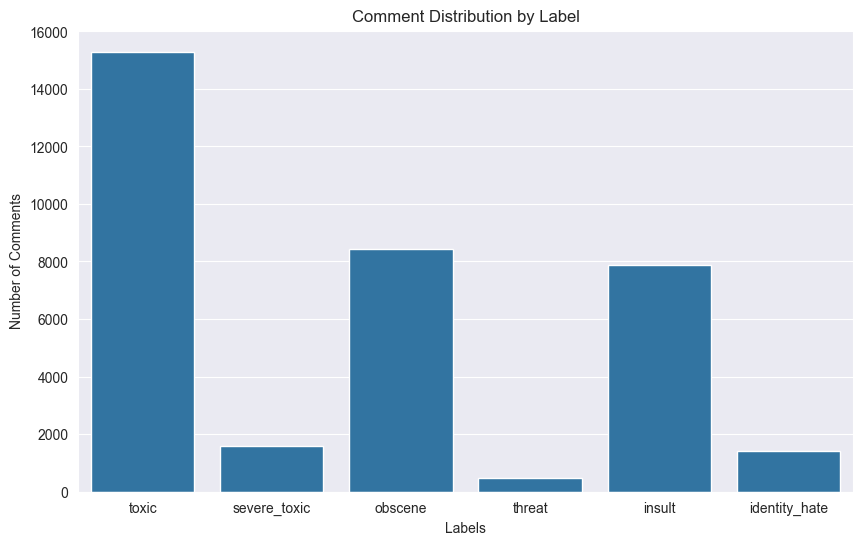

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_train[label_cols].sum().index, y=df_train[label_cols].sum().values)
plt.title('Label distribution')
plt.title('Comment Distribution by Label')
plt.ylabel('Number of Comments')
plt.xlabel('Labels')
plt.show()

2. Exploratory Data Analysis (EDA)

2.1 Missing Values and Null Checks

In [ ]:
df_train.isnull().sum()

2.2 Class Distribution

The dataset has six target columns: toxic, severe_toxic, obscene, threat, insult, identity_hate.

Display the count and proportion of each class:

In [17]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
class_counts = df_train[label_cols].sum().sort_values(ascending=False)
class_props = class_counts / len(df_train)
print(pd.concat([class_counts, class_props], axis=1, keys=['count','proportion']))

               count  proportion
toxic          15294    0.095844
obscene         8449    0.052948
insult          7877    0.049364
severe_toxic    1595    0.009996
identity_hate   1405    0.008805
threat           478    0.002996


2.3 Comment Length Analysis

Compute length of each comment (in characters and words):

In [18]:
df_train['char_count'] = df_train['comment_text'].apply(len)
df_train['word_count'] = df_train['comment_text'].apply(lambda x: len(x.split()))
display(df_train[['char_count','word_count']].describe())

,char_count,word_count
count,159571.000000,159571.000000
mean,396.593961,67.273527
std,594.387869,99.230702
min,6.000000,1.000000
25%,97.000000,17.000000
50%,207.000000,36.000000
75%,438.000000,75.000000
max,5000.000000,1411.000000


Plot histograms of comment lengths:

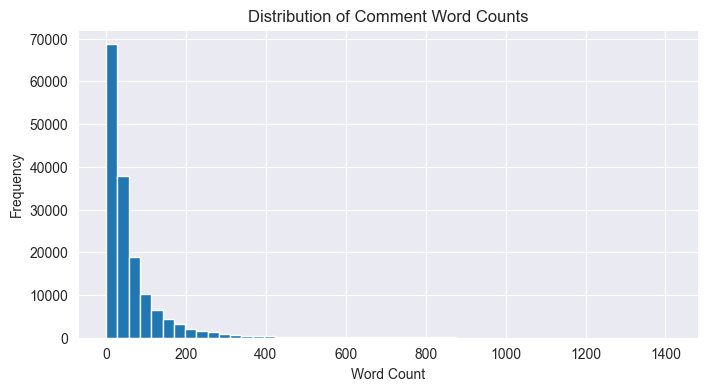

In [19]:
plt.figure(figsize=(8,4))
df_train['word_count'].hist(bins=50)
plt.title('Distribution of Comment Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

2.4 Sample Comments by Category

Show example comments for each label where the label is 1:

In [22]:
for col in label_cols:
    print(f"\nExamples of {col} comments:")
    examples = df_train[df_train[col]==1]['comment_text'].sample(2, random_state=42).tolist()
    for ex in examples:
        print("-", ex)


Examples of toxic comments:
- Hi! 

I wanna rape you!
- Terrorize 
I will terrorise you for as long as you live - you are an arrogant, disgusting and rude excuse for a human being & you are going to die soon so I suggest you stop threatening people you bastard.

Examples of severe_toxic comments:
- "

 WHAT  IN THE FUCK ARE YOU REFERRING TOO 

I HAVE NO IDEA WHAT THE PISS YOU'RE REFERRING TOO, OR WHY YOU BOTHERED TO WRITE ME.  LISTEN I'VE ADDED PLENTY TO THESE PAGE INCLUDING A ""SMASHING"" ARTICLE ON SMASHED GLADYS...BUT THAT REALLY ISNT ANY OF YOU BUSSINESS NOW IS IT.  IF SOMEBODY HAS A PROBLEM WITH ANYTHING THAT I WROTE THEM I ASSUME THEY CAN CONTACT ME THROUGH REGULAR MEANS WITHOUT YOU HAVING TO ""WIPE THEIR ASS"" FOR THEM.  IF I CAPITALIZE IT IS NOT MEANT NECCISARYLY AS AN INSULT, AND MOST PEOPLE I WRITE UNDERSTAND THAT.  IN THIS CASE IT IS BECAUSE MY CAPS BUTTON ISNT WORKING FOR SOME REASON.  SO HERES AN IDEA FOR YOU...DONT SHOVE YOUR NOSE IN MY BUSSINESS, I AM CLOSE FREINDS WITH